In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import CSV Data

In [98]:
driving=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/JoshuaMorrell/FromMotionsToActions/main/a3_data/driving.csv'))
jogging=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/JoshuaMorrell/FromMotionsToActions/main/a3_data/jogging.csv'))
sitting=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/JoshuaMorrell/FromMotionsToActions/main/a3_data/sitting.csv'))
stairs=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/JoshuaMorrell/FromMotionsToActions/main/a3_data/stairs.csv'))
walking=pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/JoshuaMorrell/FromMotionsToActions/main/a3_data/walking.csv'))

# Plot Activity Data

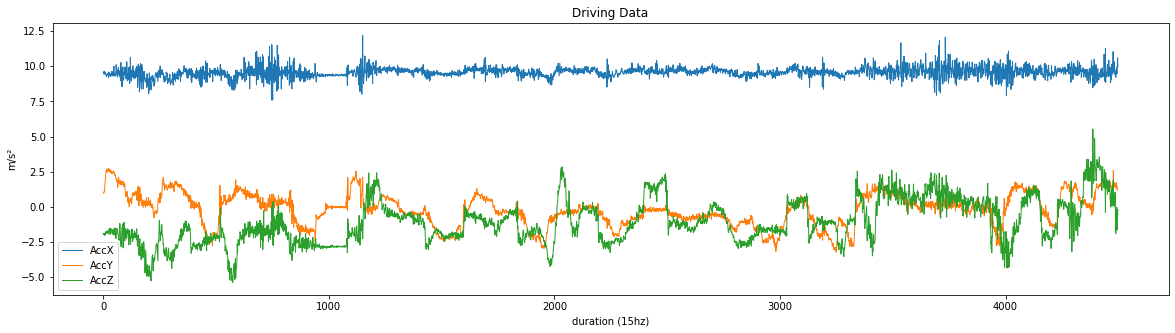

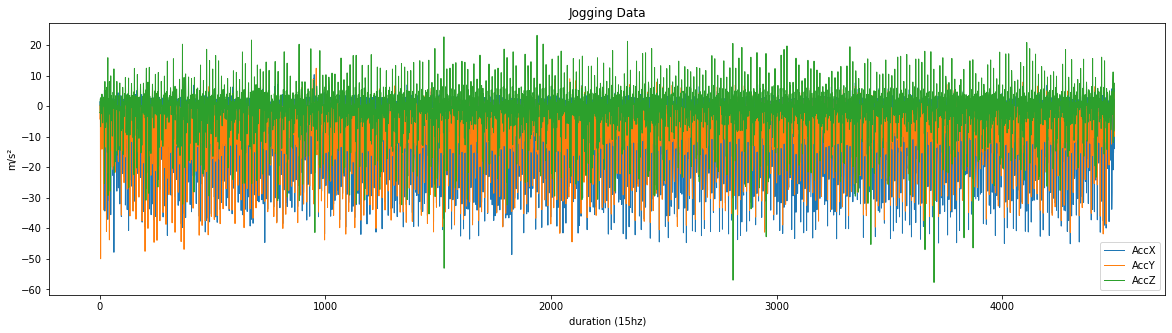

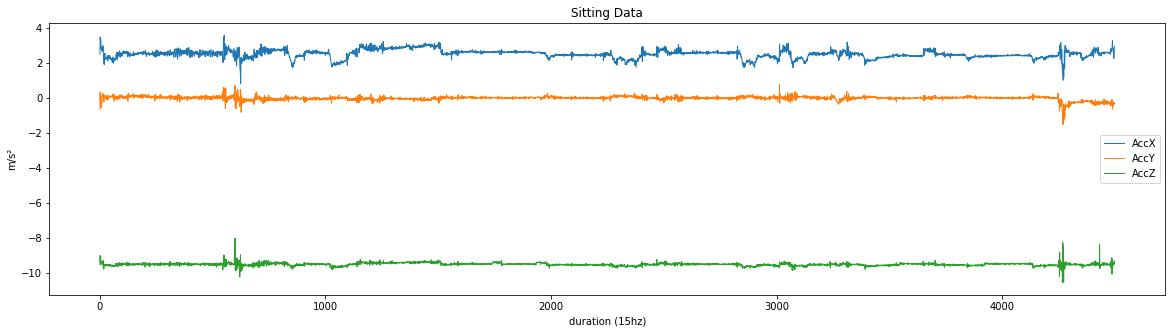

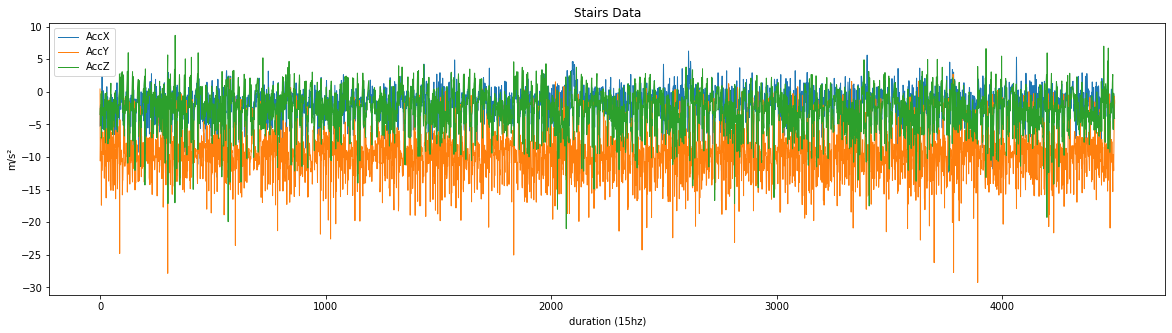

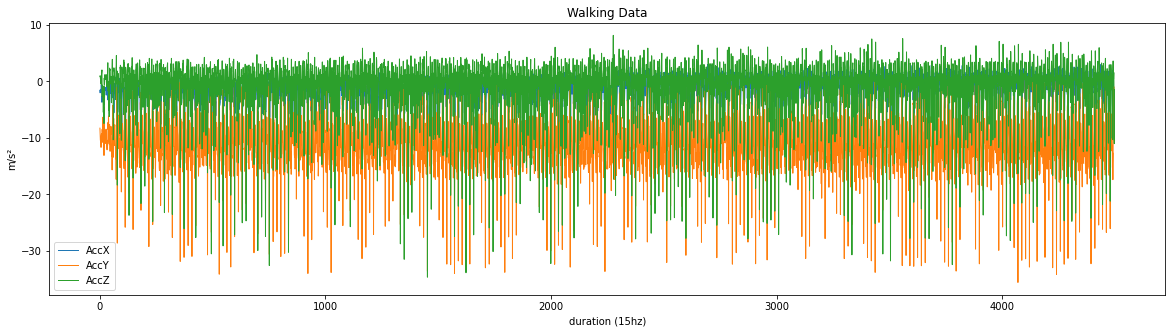

In [99]:
driving.plot(title='Driving Data', xlabel='duration (15hz)', ylabel='m/s²', figsize=(20,5), linewidth=1)
jogging.plot(title='Jogging Data', xlabel='duration (15hz)', ylabel='m/s²', figsize=(20,5), linewidth=1)
sitting.plot(title='Sitting Data', xlabel='duration (15hz)', ylabel='m/s²', figsize=(20,5), linewidth=1)
stairs.plot(title='Stairs Data', xlabel='duration (15hz)', ylabel='m/s²', figsize=(20,5), linewidth=1)
walking.plot(title='Walking Data', xlabel='duration (15hz)', ylabel='m/s²', figsize=(20,5), linewidth=1)

# Split into Training and Testing Datasets

In [100]:
driving_training=driving[:3600]
jogging_training=jogging[:3600]
sitting_training=sitting[:3600]
stairs_training=stairs[:3600]
walking_training=walking[:3600]

driving_test=driving[3600:]
jogging_test=jogging[3600:]
sitting_test=sitting[3600:]
stairs_test=stairs[3600:]
walking_test=walking[3600:]

# Create Feature Vectors

In [101]:
# each feature vector has format: [meanX, meanY, meanZ, stdX, stdY, stdZ, rangeX, rangeY, rangeZ]
def make_features(df):
  splits = np.array_split(df, 24) # 24 data points of training data
  x = []
  for data in splits:
    v = []
    v += data.mean().tolist() # mean
    v += data.std().tolist() # std
    v += (data.max() - data.min()).tolist() # range
    x.append(v)
  return x

# training set feature vectors
driving_training_features = make_features(driving_training)
jogging_training_features = make_features(jogging_training)
sitting_training_features = make_features(sitting_training)
stairs_training_features = make_features(stairs_training)
walking_training_features = make_features(walking_training)

# test set feature vectors
driving_test_features = make_features(driving_test)
jogging_test_features = make_features(jogging_test)
sitting_test_features = make_features(sitting_test)
stairs_test_features = make_features(stairs_test)
walking_test_features = make_features(walking_test)


# Classification

In [102]:
# combine training sets
x = []
y = []

x += driving_training_features
x += jogging_training_features
x += sitting_training_features
x += stairs_training_features
x += walking_training_features

# create labels/targets
y += [0 for i in driving_training_features] # 0 represents driving
y += [1 for i in jogging_training_features] # 1 represents jogging
y += [2 for i in sitting_training_features] # 2 represents sitting
y += [3 for i in stairs_training_features]  # 3 represents stairs
y += [4 for i in walking_training_features] # 4 represents walking

# Logistic Regression

In [103]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x, y)

lr_pred = []
lr_pred += lr.predict(driving_test_features).tolist()
lr_pred += lr.predict(jogging_test_features).tolist()
lr_pred += lr.predict(sitting_test_features).tolist()
lr_pred += lr.predict(stairs_test_features).tolist()
lr_pred += lr.predict(walking_test_features).tolist()

print(lr_pred)

[-0.1886341455869296, -0.1605142325338984, -0.3341508544769298, -0.3318895824407275, -0.26732189468009526, -0.17916833999537962, -0.15414241658922156, -0.18470037925560545, -0.09906651296908464, -0.06926442961043122, -0.14893907870859024, -0.1606287087287117, -0.05358941719333643, -0.17205154809308487, 0.07401021578717515, -0.07153350199671804, 0.10667306145953992, -0.05816469926796941, -0.08933050771475326, 0.007650282659828367, -0.060484651089347974, -0.03386075817292156, -0.21456787989468884, -0.16349805828223785, 0.8276117001378713, 1.3314290830259279, 1.8956925028829903, 0.504277423193106, 0.8783357599052384, 0.9010599302474571, 1.46949356625399, 1.9848495337572094, 1.1690531642265092, 0.8530625067594388, 0.8508949811199757, 0.6362513792511733, 1.1127658344132205, 0.9830689319001167, 1.6147754627795408, 0.48399645838847505, 0.570393600531296, 0.9542997927231973, 0.2762981100811799, 0.6165633533220847, 1.3177964555977528, 1.324838357501286, 0.7405959760394847, 0.9074577543037872, 2

# K-Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x, y)

knn_pred = []
knn_pred += knn.predict(driving_test_features).tolist()
knn_pred += knn.predict(jogging_test_features).tolist()
knn_pred += knn.predict(sitting_test_features).tolist()
knn_pred += knn.predict(stairs_test_features).tolist()
knn_pred += knn.predict(walking_test_features).tolist()

print(knn_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4]


# Decision Tree

In [105]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
# dtc = tree.DecisionTreeClassifier(class_weight='balanced', random_state=1254)
dtc = dtc.fit(x, y)

dtc_pred = []
dtc_pred += dtc.predict(driving_test_features).tolist()
dtc_pred += dtc.predict(jogging_test_features).tolist()
dtc_pred += dtc.predict(sitting_test_features).tolist()
dtc_pred += dtc.predict(stairs_test_features).tolist()
dtc_pred += dtc.predict(walking_test_features).tolist()

print(dtc_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


# Support Vector Machine

In [106]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x, y)

sv_pred = []
sv_pred += sv.predict(driving_test_features).tolist()
sv_pred += sv.predict(jogging_test_features).tolist()
sv_pred += sv.predict(sitting_test_features).tolist()
sv_pred += sv.predict(stairs_test_features).tolist()
sv_pred += sv.predict(walking_test_features).tolist()

print(sv_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4]


# Evaluation

In [107]:
# calculate mean squared error between predictions and actual y
from sklearn.metrics import mean_squared_error
print('linear regression error: ', mean_squared_error(y, lr_pred))
print('k-nearest neighbor error: ', mean_squared_error(y, knn_pred))
print('decision tree error: ', mean_squared_error(y, dtc_pred))
print('support vector machine error: ', mean_squared_error(y, sv_pred))

linear regression error:  0.09230444131727514
k-nearest neighbor error:  0.041666666666666664
decision tree error:  0.08333333333333333
support vector machine error:  0.025
